In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#load data into dataframe
dataset = pd.read_csv("iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [179]:
X = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dataset[['class_label']]

#dataset.shape
#print(X)
#print(y)

#normalization (0 to 1)
scaler = MinMaxScaler()
normalized = scaler.fit_transform(X)

#save the normalized data into dataframe
X = pd.DataFrame(data = normalized, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [180]:
#split training and testing data 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = True)

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [182]:
###k-nearest neighbor###

#step 1 : choose model
knn = KNeighborsClassifier(n_neighbors = 5)

#step 2 : fit into model / train
knn.fit(X_train, y_train)

#step 3: predict using testing data
y_predicted = knn.predict(X_test)

C:\Users\irfan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [183]:
###linear model###

#logistic = LogisticRegression()
#logistic.fit(X_train, y_train)
#y_predicted = logistic.predict(X_test)

In [184]:
#print(y_predicted)
print(len(y_predicted))
accuracy = metrics.accuracy_score(y_test, y_predicted)
print( "accuracy : %.2f" % (accuracy * 100) , "%")

45
accuracy : 97.78 %


Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  1]
 [ 0  0 12]]


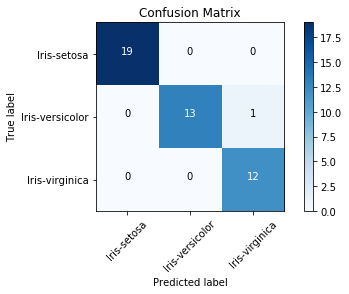

In [185]:
targetLabel = dataset['class_label'].unique()
conf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(conf_matrix, classes = targetLabel, title = "Confusion Matrix")
plt.show()